### Introduction

This project revolves around wrangling **`WeRateDogs Twitter data`** to create interesting and trustworthy analyses and visualizations. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for functional analyses and visualisations.

The last four columns in the **twitter archive** represent dog 'stages'. See [here](https://www.cyberdefinitions.com/definitions/DOGGO.html) for understanding the relevant jargon and colloquial terms.

Import relevant modules:
> pandas;
> NumPy;
> requests;
> tweepy;
> json;


In [1]:
import pandas as pd 
import numpy as np 
import requests 
import tweepy 
import json 
import re # pattern matching
import matplotlib.pyplot as plt # visualising
import seaborn as sns
%matplotlib inline

### Gathering 

#### Flat csv download

In [2]:
# Download twitter archive manually 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

#### web scraping via requests

In [3]:
# Programmatic download via requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file = requests.get(url)

In [4]:
if file.status_code == 200:
    print('Success!')
elif file.status_code == 404:
    print('Not Found.')

Success!


In [5]:
# verifying it's in a tab delimited and bytes format
#file.content

In [6]:
# write the file 
with open('image_predictions.tsv', mode='wb') as f:
    f.write(file.content)

In [7]:
image = pd.read_csv('image_predictions.tsv', sep='\t')
image.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [8]:
image.isnull().sum().sum()

0

#### API programmatic download via tweepy

In [9]:
# consumer_key = ''
# consumer_secret = ''
# access_token = ''
# access_secret = ''

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)


In [10]:
# api = tweepy.API(auth, wait_on_rate_limit=True, \
# wait_on_rate_limit_notify=True)

In [11]:
#api.get_status(tweet_id, tweet_mode='extended')

In [12]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [13]:
 auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
 auth.set_access_token(access_token, access_secret)

In [14]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [15]:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [16]:
from timeit import default_timer as timer

In [17]:
'''
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w', encoding = 'utf8') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dumps(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\', encoding = \'utf8\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dumps(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.TweepError as e:\n            print("Fail")\n            fails_dict[tweet_id] = e\n            pass\nend = timer()\nprint(end - start)\nprint(fails_dict)\n'

In [18]:
# Initialise empty list to store tweets: tweets_data
tweets_data = []
with open('tweet-json.txt', encoding='utf-8') as json_file:
    for line in json_file:
        tweet = json.loads(line)
        tweets_data.append(tweet)

In [19]:
# inspecting keys and values
print(json.dumps(tweet, indent=4, sort_keys=True))

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sun Nov 15 22:32:08 +0000 2015",
    "display_text_range": [
        0,
        131
    ],
    "entities": {
        "hashtags": [],
        "media": [
            {
                "display_url": "pic.twitter.com/BLDqew2Ijj",
                "expanded_url": "https://twitter.com/dog_rates/status/666020888022790149/photo/1",
                "id": 666020881337073664,
                "id_str": "666020881337073664",
                "indices": [
                    108,
                    131
                ],
                "media_url": "http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg",
                "media_url_https": "https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg",
                "sizes": {
                    "large": {
                        "h": 720,
                        "resize": "fit",
                        "w": 960
                    },
                    "medium": {
                        "h": 

In [20]:
# Relevant keys needed: 'id', 'favorite_count' and 'retweet_count'
print(tweets_data[0].keys())

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])


In [21]:
# Load json tweets data df: tweet_df
tweet_df = pd.DataFrame(tweets_data)

In [22]:
# Subset specific columns
tweet_df = tweet_df[['id','retweet_count', 'favorite_count',]]

In [23]:
# Rename according to schema and check 
tweet_df.rename(columns={'id':'tweet_id'}, inplace=True) #rename according to schema
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Assessing

We have 2 issues we are looking for when assessing data:
- Data quality ```(content issues)```
- Data tidiness ```(structural issues)```

***Data quality***
- Issues that pertain to content. Low quality data is also known as dirty data. 
- Examples range from duplicated or missing values i.e. data entry that should not be there in the first place.
<br>
<br>
There are four dimensions of quality data:

    1. **Completeness:** do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?

    2. **Validity:** we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).
    3. **Accuracy:** inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.
    4. **Consistency:** inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired. Example - Either use the acronym ‘NY’ or spell out ‘New York’ throughout.

***Data tidiness***
- issues pertain to structure. These structural problems generally prevent easy analysis. Untidy data is also known as messy data. 
<br>
<br>
The requirements for tidy data are:

    1. Each variable forms a column.
    2. Each observation forms a row.
    3. Each type of observational unit forms a table.
***
See [Hadley Wickham (2014)](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) for further guidelines on tidy data

### Quality

Check out the columns to get an idea of the key/value pairs and if there are any similarities

In [24]:
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [25]:
image.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [26]:
#tweet_df.nunique()
tweet_df.tweet_id.nunique()

2354

The column **tweet_id** looks to be the standardised `primary key` across the dataframes.

***
Check the contents of each dataframe using `head/tail/sample`

***twitter_archive table***

In [27]:
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [28]:
twitter_archive.tail(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [29]:
twitter_archive.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1431,697516214579523584,NaN,NaN,2016-02-10 20:23:19 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Say hello to Pherb. He does parkour. 9/10 http...,NaN,NaN,NaN,https://vine.co/v/i1LriMBmX6W,9,10,Pherb,None,None,None,None


***image table***

In [30]:
image.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [31]:
image.tail(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [32]:
image.sample(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1649,809084759137812480,https://pbs.twimg.com/media/CzpyM41UoAE1b2w.jpg,1,vizsla,0.911412,True,bloodhound,0.017134,True,Labrador_retriever,0.011761,True


***tweet_df table***

In [33]:
tweet_df.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


In [34]:
tweet_df.tail(1)

,tweet_id,retweet_count,favorite_count
2353,666020888022790149,532,2535


In [35]:
tweet_df.sample(1)

,tweet_id,retweet_count,favorite_count
1179,719332531645071360,1078,3711


***
**twitter_archive**:
* There are missing values (NANs/Nones) with regards to the **in_reply_to**, **retweeted_status**, **name** columns. 
* Also occurs in Dog 'stage' headers after **'Doggo'**, **'floofer'** etc.

**image**:
* No obvious problems that can be detected visually.

**tweet_df**:
* No obvious problems that can be detected visually.

***
### Completeness 

* This is a check to see whether we have all the records.
* If not, then we check for the specific rows/columns/cells missing.

In [36]:
# Checking the number of rows across dataframes
# 

archive_count = twitter_archive.shape[0]
image_count = image.shape[0]
tweet_count = tweet_df.shape[0]


print('The number of tweet ids in the dataframe tweet_archive is: {}'.format(archive_count))
print('The number of tweet ids in the dataframe image_count is: {}'.format(image_count))
print('The number of tweet ids in the dataframe tweet_count is: {}'.format(tweet_count))

The number of tweet ids in the dataframe tweet_archive is: 2356
The number of tweet ids in the dataframe image_count is: 2075
The number of tweet ids in the dataframe tweet_count is: 2354


In [37]:
# Testing to show the number of rows in each df 
#  are identical to those of tweet_id
assert twitter_archive.shape[0] == twitter_archive.tweet_id.shape[0]
assert image.shape[0] == image.tweet_id.shape[0]
assert tweet_df.shape[0] == tweet_df.shape[0]

* <font color=red>Number of rows (tweet_ids) in each dataframe/table are not equal </font>
***

Search for columns in each dataframe where there are null values using ```.isnull()```

In [38]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [39]:
image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [40]:
tweet_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

* <font color=red>Null values across the dataframes are enitrely present in the **twitter_archive** table</font>
***

In the **twitter_archive**, values under the headers illustrating the dog 'stage' have 'None', which represent null values.

In [41]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [42]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [43]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [44]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

Null/NAN values in **twitter_archive** represented as 'None' in dog 'stage' columns

*Maybe a general problem OR would be corrected once tidiness is accomplished*

* Detecting these data completeness (quality) issues is useful, because we want to join these tables at some point.
* As joining and cleaning is accomplished, we wil get a dataset where the rows overlap i.e. where the number of tweet_ids are identical out of the minimum set of **tweet_ids**

***
### Validity 

Use ```.describe()``` to illustrate the 5 number summary for each table

In [45]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


* The rating for the numerator has an extreme value of 1776.
* The denominator has a maximum rating out of 170.
* Standardised ratings should be out of 10!

In [46]:
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [47]:
tweet_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


There are no negative values in any of these dataframes.

In [48]:
numerator_above_10 = twitter_archive.query("rating_numerator > 10")
len(numerator_above_10)

1455

In [49]:
# Locating the name of the row (dog) with the highest numerator rating
numerator_numeric = twitter_archive.set_index('name').select_dtypes('number')
idx = numerator_numeric.idxmax()
idx['rating_numerator']

'Atticus'

* <font color=red>The numerator rating is greater than 10 in 1455 occurences</font>
***

In [50]:
denominator_above_10 = twitter_archive.query("rating_denominator > 10")
len(denominator_above_10)

20

In [51]:
denominator_below_10 = twitter_archive.query("rating_denominator < 10")
len(denominator_below_10)

3

* <font color=red>The denominator rating does not equal 10 in 23 occurences</font>
***

***
### Accuracy 

N/A - no issues of note.

***
### Consistency

Check for any names in the **twitter_archive** that are lowercase, uppercase and propercase

In [52]:
twitter_archive.name.value_counts().head()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Name: name, dtype: int64

In [53]:
# Lowercase
twitter_archive.name.str.islower().sum()

109

In [54]:
# Uppercase
# Stick with this format but beware of the None values 
twitter_archive.name.str.isupper().sum()

2

In [55]:
# Propercase
twitter_archive.name.str.istitle().sum()

2241

In [56]:
# Computing the amount of names in the twitter_archive
len(twitter_archive.name)

2356

* <font color=red>Inconsistent cases of dog names where most values are proper rather than upper/lower case</font>
***

In [57]:
twitter_archive.name.head(25)

0      Phineas
1        Tilly
2       Archie
3        Darla
4     Franklin
5         None
6          Jax
7         None
8         Zoey
9       Cassie
10        Koda
11       Bruno
12        None
13         Ted
14      Stuart
15      Oliver
16         Jim
17        Zeke
18     Ralphus
19      Canela
20      Gerald
21     Jeffrey
22        such
23      Canela
24        None
Name: name, dtype: object

In [58]:
# r = r'[ ]*[a-zA-Z]{1,3}[ ]*'
# a = twitter_archive.name.str.len()
#b = twitter_archive.query("@a <= 5")
#b.name.value_counts()

* A 'None' value contained in the dog **name** columns does mean there is an issue. Further visual assessment is needed. 
* This could be a consistency issue or completeness issue or both.
* The tool/algorithm used to extract the dog names is rudimentary and not able to distinguish between preposition and a noun with a sentence/tweet.
* A more appropriate tool would be to use Natural Language Processing which is beyond the scope of this project. 
* Instead, focus on the preposition/verb phrases and replace them by 'None'

* <font color=red>Incorrect parsed values/phrases like 'the', 'a', 'my' etc., instead of dog names</font>
***

Check data types for each of the tables

In [59]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

* <font color=red>data type for **timestamp** and **retweeted_status_timestamp** contain datetime, data type is incorrectly classed as ``object``</font>
* <font color=red>Dog stages are finite/grouped, data type is incorrectly classed as ``object``</font>
* <font color=red>data type for **tweet_id** contains a string of ids, data type is incorrectly classed as ``int``</font>
***

In [60]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [61]:
# check if dog breeds number of rows are the same for each prediction
assert image.p1.shape[0] == image.p2.shape[0] == image.p3.shape[0]

In [62]:
image.p1.value_counts(normalize=True).head()

golden_retriever      0.072289
Labrador_retriever    0.048193
Pembroke              0.042892
Chihuahua             0.040000
pug                   0.027470
Name: p1, dtype: float64

In [63]:
image.p2.value_counts(normalize=True).head()

Labrador_retriever    0.050120
golden_retriever      0.044337
Cardigan              0.035181
Chihuahua             0.021205
Pomeranian            0.020241
Name: p2, dtype: float64

In [64]:
image.p3.value_counts(normalize=True).head()

Labrador_retriever    0.038072
Chihuahua             0.027952
golden_retriever      0.023133
Eskimo_dog            0.018313
kelpie                0.016867
Name: p3, dtype: float64

In [65]:
len(image.p1.value_counts())

378

In [66]:
len(image.p2.value_counts())

405

In [67]:
len(image.p3.value_counts())

408

* <font color=red>Dog breeds are finite/grouped, data type is incorrectly classed as ``object``</font>
***

In [68]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


* Data types for **tweet_df** columns/values seem fine.

Check for any duplicates

In [69]:
all_columns = pd.Series(list(twitter_archive) + list(image)+ list(tweet_df))

In [70]:
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

* Given **tweet_id** is our primary key, there's no need to drop/alter.

***
### Tidiness 

Start by visually assessing the tables 

In [71]:
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


* Noticeably, the last four columns headers describe dog stages.
* However, in its current form, this violates the first principle of tidy data - **Each variable forms a column**.
* Currently, ***column headers are values, not variable names***.

* <font color=red>There are four values in four different columns with ***no*** defined variable **(dog_stage)**</font>
***

In [72]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


* **image** predictions table satisfies all three tidy data requirements leave as is

In [73]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


The **tweet_df** and **twitter_archive** are connected, as they both share a common observational unit regarding tweet statistics.

* <font color=red>**Tweet_df** and **twitter_archive** share common observational units, but are separated into two different tables</font>
***

* <font color=green>Final outcome - 3 tables consolidated into **2 tables**, with the only shared columns being the primary key **tweet_id**</font>

### Summary Assessment 
***
#### Quality 

##### Completeness

- <font color=red>Number of rows (tweet_ids) in each dataframe/table are not equal </font>
- <font color=red>Null values across the dataframes are entirely present in the **twitter_archive** table</font>

##### Validity

- <font color=red>The numerator rating is greater than 10 on 1455 occurences</font>
- <font color=red>The denominator rating does not equal 10 on 23 occurences</font>

##### Accuracy 

- N/A - no issues of note.

#####  Consistency 

- <font color=red>Inconsistent cases of dog names where most values are proper rather than upper/lower case</font>
- <font color=red>Incorrect parsed values/phrases like 'the', 'a', 'my' etc., instead of dog names</font>
- <font color=red>data type for **timestamp** and ~~**retweeted_status_timestamp**~~ contain datetime, data type is incorrectly classed as ``object``</font>
- <font color=red>data type for **tweet_id** contains a string of ids, data type is incorrectly classed as ``int``</font>
- <font color=red>Dog stages are finite/grouped, data type is incorrectly classed as ``object``</font>

***
#### Tidiness
- <font color=red>There are four values in four different columns with ***no*** defined variable **(dog_stage)**</font>
- <font color=red>**Tweet_df** and **twitter_archive** share common observational units, but are separated into two different tables</font>

### Cleaning

Creating a copy as to keep old tables before any changes, while not overwriting the old tables as cleaning is performed.

Steps taken:<br><br>

1. ***Define*** - document the issue and the what is going to be done
2. ***Code*** - use programming to fix the issue
3. ***Test*** - check that the change is in place and satisifes requirements

In [74]:
# This is achieved via df.copy 
archive_clean = twitter_archive.copy()
image_clean = image.copy()
tweet_clean = tweet_df.copy()

In [75]:
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [76]:
archive_clean.columns.shape

(17,)

### Completeness/Missing data

#### `twitter_archive`: <font color=red>Null values across the dataframes are enitrely present in the **twitter_archive** table</font>

##### Define
Drop columns that hold **in_reply_to_**, **retweeted_status** and **expanded_urls_** information as they are redundant and contain null values. Accomplished via ```df.drop()```

##### Code

In [77]:
#columns = ['in_reply_to_status_id', 'in_reply_to_user_id'\
    #      , 'retweeted_status_id', 'retweeted_status_user_id'\
     #     , 'retweeted_status_timestamp', 'expanded_urls']

#archive_clean = archive_clean.drop(columns, axis=1)

In [78]:
# specifying unneeded columns via a list comprehension
# to_remove = [c for c in df.columns if "Total" in c] # redudant columns

remove_1 = [col for col in archive_clean.columns if "reply" in col]
remove_2 = [col2 for col2 in archive_clean.columns if "retweeted" in col2]
remove_3 = [col3 for col3 in archive_clean.columns if "expanded" in col3]

# Putting the iteration of dropping columns in practice 

archive_clean.drop(remove_1, axis=1, inplace=True)
archive_clean.drop(remove_2, axis=1, inplace=True)
archive_clean.drop(remove_3, axis=1, inplace=True)

##### Test

In [79]:
archive_clean.head(0)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [80]:
archive_clean.columns.shape

(11,)

<font color=red>Number of rows (tweet_ids) in each dataframe/table are not equal</font>

##### Define
Match all the columns that contain **tweet_id** in each dataframe to achieve an identical number of rows. This is achieved via ```df.merge(how='inner')```

##### Code

In [81]:
archive_clean = pd.merge(archive_clean, image_clean, how='inner', on='tweet_id')
tweet_clean = pd.merge(tweet_clean, image_clean, how='inner', on='tweet_id')

In [82]:
# Keep only rows with its original columns and drop the ones from images 

columns_image = ['jpg_url', 'img_num', 'p1', 'p1_conf'\
                 , 'p1_dog', 'p2', 'p2_conf', 'p2_dog'\
                 , 'p3', 'p3_conf', 'p3_dog']

archive_clean = archive_clean.drop(columns_image, axis=1)
tweet_clean = tweet_clean.drop(columns_image, axis=1)

##### Test

In [83]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id              2075 non-null int64
timestamp             2075 non-null object
source                2075 non-null object
text                  2075 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  2075 non-null object
doggo                 2075 non-null object
floofer               2075 non-null object
pupper                2075 non-null object
puppo                 2075 non-null object
dtypes: int64(3), object(8)
memory usage: 194.5+ KB


In [84]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [85]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 3 columns):
tweet_id          2073 non-null int64
retweet_count     2073 non-null int64
favorite_count    2073 non-null int64
dtypes: int64(3)
memory usage: 64.8 KB


<font color=blue>Close enough, given there might be 1/2 different tweet_ids in either of the 3 dataframes</font>

***

### Tidiness

#### `twitter_archive`: <font color=red> There are four values in four different columns with ***no*** defined variable **(dog_stage)**</font>

* Keep separate dataframe for value of dog stages
* Then do ```left-outer/outer join``` in master towards the end

##### Define

Dog stages - doggo, floofer, pupper and puppo - should be grouped under a variable name **dog_stage**. Accomplished via ```pd.melt()```

##### Code

In [86]:
fixed_columns = ['tweet_id', 'timestamp', 'source', 'text',\
                 'rating_numerator', 'rating_denominator', 'name']

In [87]:
dog_stages = pd.melt(archive_clean, id_vars= fixed_columns\
                       , var_name='dog_stage', value_name='value')


In [88]:
dog_stages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8300 entries, 0 to 8299
Data columns (total 9 columns):
tweet_id              8300 non-null int64
timestamp             8300 non-null object
source                8300 non-null object
text                  8300 non-null object
rating_numerator      8300 non-null int64
rating_denominator    8300 non-null int64
name                  8300 non-null object
dog_stage             8300 non-null object
value                 8300 non-null object
dtypes: int64(3), object(6)
memory usage: 583.7+ KB


In [89]:
dog_stages = dog_stages.loc[dog_stages['value'] != 'None']

In [90]:
dog_stages.drop(columns=['value'], axis=1, inplace=True)

In [91]:
dog_stages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 9 to 7116
Data columns (total 8 columns):
tweet_id              334 non-null int64
timestamp             334 non-null object
source                334 non-null object
text                  334 non-null object
rating_numerator      334 non-null int64
rating_denominator    334 non-null int64
name                  334 non-null object
dog_stage             334 non-null object
dtypes: int64(3), object(5)
memory usage: 23.5+ KB


##### Test

* For now, this can be its own dataframe **dog_stages**
* Later, do an outer join to keep all values and accumulate ```None``` values that the algorithm could not parse

In [92]:
dog_stages.dog_stage.value_counts()

pupper     222
doggo       80
puppo       24
floofer      8
Name: dog_stage, dtype: int64

***

<font color=red>**Tweet_df** and **twitter_archive** share common observational units, but are separated into two different tables</font>

##### Define
Join **tweet_df** and **twitter_archive** - via ```df.merge(how='inner')``` - into a single dataframe

##### Code

In [93]:
archive_clean = pd.merge(archive_clean, tweet_clean, how='inner', on='tweet_id')

In [94]:
# Reorder columns so that retweet and favorite count are at the front

new_order = [0,11,12,1,2,3,4,5,6,7,8,9,10]
# df[df.columns[new_order]]
archive_clean = archive_clean[archive_clean.columns[new_order]]

##### Test

In [95]:
archive_clean.head(0)

,tweet_id,retweet_count,favorite_count,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [96]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 13 columns):
tweet_id              2073 non-null int64
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
timestamp             2073 non-null object
source                2073 non-null object
text                  2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
doggo                 2073 non-null object
floofer               2073 non-null object
pupper                2073 non-null object
puppo                 2073 non-null object
dtypes: int64(5), object(8)
memory usage: 226.7+ KB


****

### Validity

#### `twitter_archive`: <font color=red>The numerator rating is greater than 10 on 1455 occurences</font>

##### Define
Change the numerator ratings that are greater than 10 to be **exactly 10** in all occurences, using ```df.replace()```

##### Code

In [97]:
numerator_change = archive_clean['rating_numerator'].loc[archive_clean['rating_numerator'] > 10]

In [98]:
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].replace([numerator_change], 10)

##### Test

In [99]:
# Numerator ratings only range from 0-10 

archive_clean['rating_numerator'].value_counts()

10    1658
9      151
8       95
7       52
5       34
6       32
3       19
4       16
2        9
1        5
0        2
Name: rating_numerator, dtype: int64

***

#### `twitter_archive`: <font color=red>The denominator rating does not equal 10 in 23 occurences</font>

##### Define
Change the denominator ratings that do not match 10 (greater than/equal to) to be **exactly 10** in all occurences, using ```df.replace()```

##### Code

In [100]:
denominator_change = archive_clean['rating_denominator'].loc[archive_clean['rating_denominator'] != 10]

In [101]:
archive_clean['rating_denominator'] = archive_clean['rating_denominator'].replace([denominator_change], 10)

##### Test

In [102]:
# Denominator ratings are only (out of) 10

archive_clean['rating_denominator'].value_counts()

10    2073
Name: rating_denominator, dtype: int64

***

### Consistency

#### `twitter_archive`:  <font color=red> data type for **timestamp** and ~~**retweeted_status_timestamp**~~ contain datetime, data type is incorrectly classed as ``object``</font>

##### Define
Change columns that contain timestamps in the tweets_df to ```datatime64[ns]```

In [103]:
archive_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'timestamp', 'source',
       'text', 'rating_numerator', 'rating_denominator', 'name', 'doggo',
       'floofer', 'pupper', 'puppo'],
      dtype='object')

##### Code

In [104]:
# Convert the specified column to 'datetime64[ns]'

archive_clean['timestamp'] = archive_clean['timestamp'].astype('datetime64[ns]')

##### Test

In [105]:
# Proving that the column 'timestamp' is now in its appropriate data type

assert archive_clean['timestamp'].dtypes == 'datetime64[ns]'

***

<font color=red>Dog stages are finite/grouped, data type is incorrectly classed as ``object``</font>

##### Define
Change the data type for **dog_stage** to ```categorical```

##### Code

In [106]:
# Convert the specified column to 'category'

dog_stages['dog_stage'] = dog_stages['dog_stage'].astype('category')

##### Test 

In [107]:
# Proving that the column 'dog_stage' is now in its appropriate data type

assert dog_stages['dog_stage'].dtypes == 'category'

***

<font color=red>data type for **tweet_id** contains a string of ids, data type is incorrectly classed as ``int``</font>

##### Define
Change the data type for **tweet_id** in each *relevant* dataframe to ```string('object')```

##### Code

In [108]:
# convert the tweet_id in the specified dataframes to 'object'

archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('object')
image_clean['tweet_id'] = image_clean['tweet_id'].astype('object')
dog_stages['tweet_id'] = dog_stages['tweet_id'].astype('object')

##### Test 

In [109]:
# Proving that the column 'tweet_id' is now in its appropriate data type
# for each dataframe

assert archive_clean['tweet_id'].dtypes == 'object'
assert image_clean['tweet_id'].dtypes == 'object'
assert dog_stages['tweet_id'].dtypes == 'object'

***

#### ```twitter_archive```: <font color=red>Incorrect parsed values/phrases like 'the', 'a', 'my' etc., instead of dog names</font>

##### Define
Incorrect parsed values/phrases like 'the', 'a', 'my' etc., instead of dog names.

A for loop to count the number of times missing and assigning the slice to value 'None' will amend this problem<br><br>

##### Code

Using visual assessment, finding phrases/words that incorrectly parse names, instead detecting verbs, pronouns, prepositions etc.

In [110]:
missing_names = ['a', 'actually', 'all', 'an', 'by','getting',
'his','incredibly','infuriating','just','life','light','mad','my',
'not','officially','old','one','quite','space','such','the','this',
 'unacceptable', 'very']

In [111]:
for name in archive_clean.name:
    if name in missing_names:
        archive_clean.name.loc[archive_clean['name'] == name] = 'None'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


##### Test

In [112]:
# Should have an empty series - i.e. no names from missing_names list

archive_clean['name'].loc[archive_clean.name == 'missing_names']

Series([], Name: name, dtype: object)

In [113]:
# Double check: no names from the missing_names list 

archive_clean['name'].str.contains(missing_names, regex=False).count()

0

In [114]:
archive_clean.name.value_counts().head()

None       677
Charlie     11
Tucker      10
Oliver      10
Penny       10
Name: name, dtype: int64

*** 

#### ```twitter_archive```: <font color=red>Inconsistent cases of dog names where most values are proper rather than upper/lower case</font>

##### Define

All dog names should be in proper case for consistency. This is accomplished via `pandas.Series.str.title()`


##### Code

In [115]:
archive_clean['name'] = archive_clean['name'].str.title()

##### Test

In [116]:
# All the dog names are now in proper case 

print(archive_clean.name.str.istitle().sum())
assert archive_clean.name.str.istitle().all()

2073


### Final changes/formatting

In [117]:
archive_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'timestamp', 'source',
       'text', 'rating_numerator', 'rating_denominator', 'name', 'doggo',
       'floofer', 'pupper', 'puppo'],
      dtype='object')

In [118]:
# Drop the redundant columns illustrating dog stages

drop_1 = ['doggo', 'floofer', 'pupper', 'puppo']
archive_clean.drop(columns=drop_1, inplace=True)

In [119]:
dog_stages.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [120]:
drop_2 = ['timestamp', 'source', 'text', 'rating_numerator'\
        ,'rating_denominator', 'name']
dog_stages.drop(columns=drop_2, inplace=True)

In [121]:
dog_stages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 9 to 7116
Data columns (total 2 columns):
tweet_id     334 non-null object
dog_stage    334 non-null category
dtypes: category(1), object(1)
memory usage: 5.7+ KB


In [122]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 9 columns):
tweet_id              2073 non-null object
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
timestamp             2073 non-null datetime64[ns]
source                2073 non-null object
text                  2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 162.0+ KB


In [123]:
# Performing the 'outer-left join' we proposed earlier 

archive_clean = pd.merge(archive_clean, dog_stages, how='left', on='tweet_id')
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2085
Data columns (total 10 columns):
tweet_id              2086 non-null object
retweet_count         2086 non-null int64
favorite_count        2086 non-null int64
timestamp             2086 non-null datetime64[ns]
source                2086 non-null object
text                  2086 non-null object
rating_numerator      2086 non-null int64
rating_denominator    2086 non-null int64
name                  2086 non-null object
dog_stage             333 non-null category
dtypes: category(1), datetime64[ns](1), int64(4), object(4)
memory usage: 165.2+ KB


In [124]:
# Confirm the rest of the dog_Stage values are NANs

archive_clean.dog_stage.isnull().sum(),
archive_clean.dog_stage.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: dog_stage, dtype: category
Categories (4, object): [doggo, floofer, pupper, puppo]

In [125]:
# Handling the missing values - NANs become 'None' to represent
# unclassified dog stages

# This step is crucial to recognise, since we want to place 'None',
# but it needs to be recognised under our categorical data type first
# before any filling is done

archive_clean['dog_stage'] = archive_clean['dog_stage']\
.cat.add_categories(['None'])

# Now this is achievable using value='None' and confirming chances as per

archive_clean['dog_stage'].fillna(value='None', inplace=True)


In [126]:
archive_clean.dog_stage.value_counts()

None       1753
pupper      221
doggo        80
puppo        24
floofer       8
Name: dog_stage, dtype: int64

<font color=green>Final last check for the 2 tables we have earlier said as being consolidated in our final outcome.</font>

In [127]:
archive_clean.isnull().sum()

tweet_id              0
retweet_count         0
favorite_count        0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
dog_stage             0
dtype: int64

In [128]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2085
Data columns (total 10 columns):
tweet_id              2086 non-null object
retweet_count         2086 non-null int64
favorite_count        2086 non-null int64
timestamp             2086 non-null datetime64[ns]
source                2086 non-null object
text                  2086 non-null object
rating_numerator      2086 non-null int64
rating_denominator    2086 non-null int64
name                  2086 non-null object
dog_stage             2086 non-null category
dtypes: category(1), datetime64[ns](1), int64(4), object(4)
memory usage: 165.2+ KB


In [129]:
image_clean.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [130]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [131]:
assert archive_clean.name.str.istitle().all()

In [132]:
archive_clean.duplicated().sum()

0

<font color=blue>As suggested earlier, there may have been duplicates in the ```twitter_archive``` for us to clean, but using ```.duplicated()``` shows this probably is not the case.
<br><br>
Perhaps concerning about the same number of **tweet_ids** in these above two dataframes is trivial, given different contents, and the number of rows is close enough anyway...
</font>

### Storing wrangled data

In [133]:
# Storing data in csv format requires its name
# We use index=False to prevent the outcome of a redundant index column

archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)
image_clean.to_csv('image_predictions_master.csv', encoding='utf-8', index=False)

### Analysing wrangled data

As we have wrangled and clean the **`WeRateDogs Twitter data`**, analyses can be performed to carry out insights and visualiations about the data set.

In [134]:
archive_master = pd.read_csv('twitter_archive_master.csv')
image_master = pd.read_csv('image_predictions_master.csv')

In [135]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 10 columns):
tweet_id              2086 non-null int64
retweet_count         2086 non-null int64
favorite_count        2086 non-null int64
timestamp             2086 non-null object
source                2086 non-null object
text                  2086 non-null object
rating_numerator      2086 non-null int64
rating_denominator    2086 non-null int64
name                  2086 non-null object
dog_stage             2086 non-null object
dtypes: int64(5), object(5)
memory usage: 163.0+ KB


In [136]:
image_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [137]:
# Retrieve relevant data types for archive

archive_master['tweet_id'] = archive_master['tweet_id'].astype('object')
archive_master['timestamp'] = archive_master['timestamp'].astype('datetime64[ns]')
archive_master['dog_stage'] = archive_master['dog_stage'].astype('category')

In [138]:
# Retrieve relevant data types for image

image_master['tweet_id'] = image_master['tweet_id'].astype('object')

In [139]:
# Check 

assert archive_master['tweet_id'].dtypes == 'object'
assert image_master['tweet_id'].dtypes == 'object'
assert archive_master['timestamp'].dtypes == 'datetime64[ns]'
assert archive_master['dog_stage'].dtypes == 'category'

***

> Make a pie chart to count the most popular dog stage

In [140]:
archive_master.dog_stage.value_counts(normalize=False)

None       1753
pupper      221
doggo        80
puppo        24
floofer       8
Name: dog_stage, dtype: int64

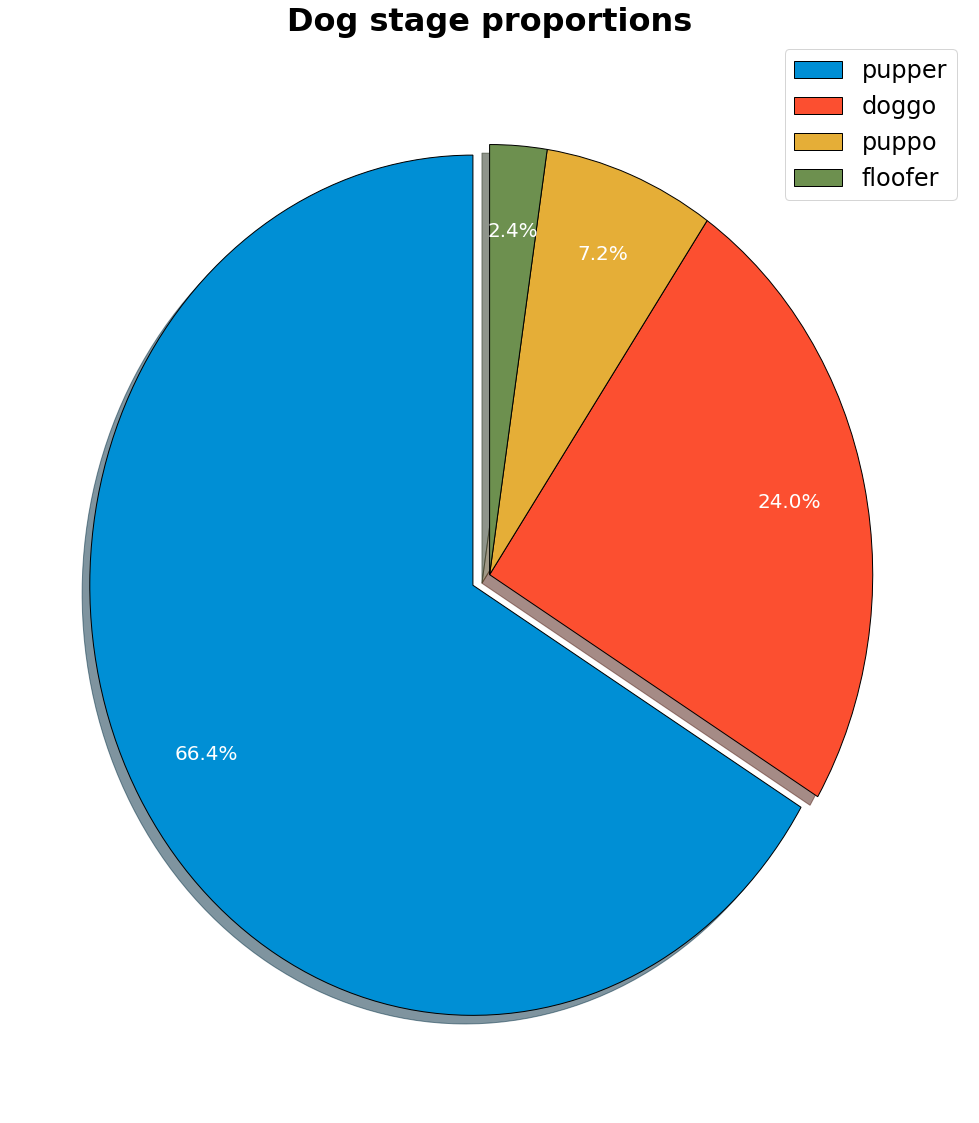

In [143]:
# We are excluding 'None' given the algorithm couldn't parse 
# portions of dog_stages.
# Pie chart, where the slices will be ordered 
# and plotted counter-clockwise:

labels = ('pupper', 'doggo', 'puppo', 'floofer') 
sizes = [221, 80, 24, 8]
explode = (0.05, 0, 0, 0) 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f']

plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%'
        , shadow=True, startangle=90, pctdistance=0.8,
        textprops=dict(color="w")
        , colors=colors, wedgeprops={'edgecolor': 'black'})

font = {'size': 32,
        'weight': 'heavy'} # control title font and size

plt.title('Dog stage proportions', fontdict=font)
plt.tight_layout() # maintains the spacing
plt.rcParams['figure.figsize'] = 14,16
plt.rcParams.update({'font.size': 20})
plt.legend(fontsize='large')
plt.show();

In [144]:
# Using a slice to select the first dog_stage that is 'None'

None_values = archive_master.dog_stage.value_counts\
(normalize=True)[0]
print("The proportion of 'None' values representing dog stages\
 is {0:.2f}".format(None_values))

The proportion of 'None' values representing dog stages is 0.84


Altogether from the dataset, 84% of dog stage names are missing, which arguablly makes it hard to discern what users preferences are at different dog stages as a sample! 

See here for dog colloquialisms - [DoggoLingo](https://en.wikipedia.org/wiki/DoggoLingo)
* Nevertheless, out of 16% of the dataset values we have left analyse, we find that an overwhelming amount of users **(66.4%)** prefer the dog stage **'pupper' (small/young dog)**.
* This was followed by **24%** of users preferring **'doggo' (regular dog size)**, **7.2%** preferring **'puppo' (puppy)** and **2.4%** preferring **'floofer' (dog with a fluffy coat)**.

***

> Ratings (numerator) distribution - histogram

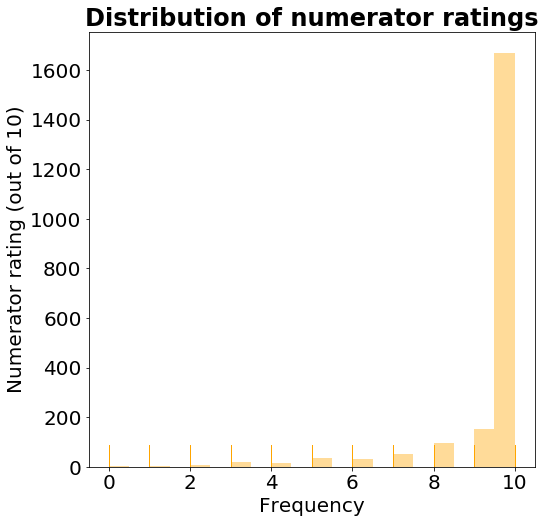

In [147]:
var = archive_master.rating_numerator

font = {'size': 24,
        'weight': 'heavy'} 

sns.distplot(var, bins=20, kde=False, rug=True, vertical=False, 
             color='orange')
plt.title('Distribution of numerator ratings', fontdict=font)
plt.ylabel('Numerator rating (out of 10)', fontsize='medium')
plt.xlabel('Frequency', fontsize='medium')
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = 8,8;

In [148]:
# Calculate relative proportions of dog ratings (numerator)

var.value_counts(normalize=True)

10    0.800575
9     0.072387
8     0.045542
7     0.024928
5     0.016779
6     0.015340
3     0.009108
4     0.007670
2     0.004314
1     0.002397
0     0.000959
Name: rating_numerator, dtype: float64

We have the complete data set to evaluate dog ratings by twitter users
* More than **80% of users (at least 1600)** gave the highest rating **(10)** to the dogs tweeted!
* Ratings below 10 did not account for much and were far behind.
* This suggests WeRateDogs is a popular account for users to view/follow.

***

> Most common dog breeds (counts) - barplot

In [149]:
# Select only p1 given those were the most accurate predictions by 
# the neural network (algorithm)

image_master['p1'].head()

0    Welsh_springer_spaniel
1                   redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        miniature_pinscher
Name: p1, dtype: object

In [150]:
# Count the different type of dog breeds
# As there are many dogs breeds, select top 10

s = image_master['p1'].value_counts().head(10) 
s

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
cocker_spaniel         30
Name: p1, dtype: int64

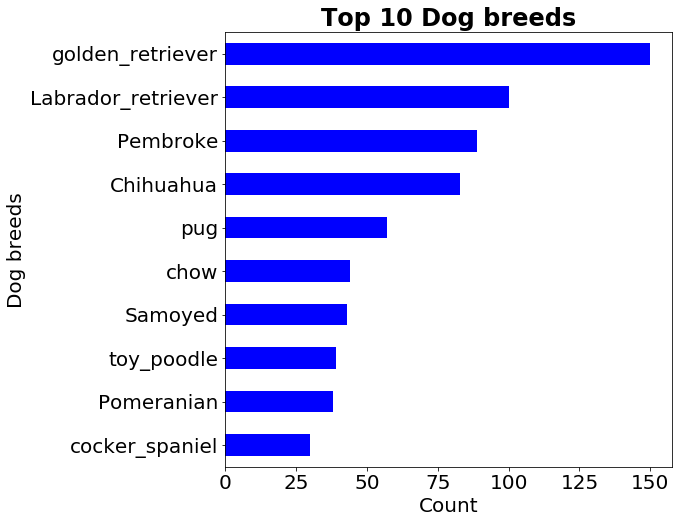

In [153]:
s.sort_values().plot(kind='barh', colormap='winter') # consistent color

font = {'size': 24,
        'weight': 'heavy'} 

plt.title('Top 10 Dog breeds', fontdict=font)
plt.ylabel('Dog breeds', fontsize='medium')
plt.xlabel('Count', fontsize='medium')
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = 8,8;

* The most popular breed ranked in terms of tweets is the **Golden retriever** with **150** references.
* This was followed by **Labrador retriever**, **Pembroke** and **Chihuahua**, being clustered together with references amounting to **100**, **89** and **83** respectively.
* The rest of the dog breeds had 60 or less references, starting from **pug**, amounting to **57**.

***

> Retweet and favorite count over time - line plot (time series)

In [154]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 10 columns):
tweet_id              2086 non-null object
retweet_count         2086 non-null int64
favorite_count        2086 non-null int64
timestamp             2086 non-null datetime64[ns]
source                2086 non-null object
text                  2086 non-null object
rating_numerator      2086 non-null int64
rating_denominator    2086 non-null int64
name                  2086 non-null object
dog_stage             2086 non-null category
dtypes: category(1), datetime64[ns](1), int64(4), object(4)
memory usage: 149.0+ KB


In [155]:
# Earliest timestamp in dataset 

earliest = archive_master.timestamp.tail(1)
earliest

2085   2015-11-15 22:32:08
Name: timestamp, dtype: datetime64[ns]

In [156]:
# Latest timestamp in dataset

latest = archive_master.timestamp.head(1)
latest

0   2017-08-01 16:23:56
Name: timestamp, dtype: datetime64[ns]

Time of data runs between 2-3 years 

In [157]:
# Set index of the dataframe to datetime

archive_master.set_index('timestamp', inplace=True)

In [158]:
# Set the resample to year 

archive_master.resample('A')

DatetimeIndexResampler [freq=<YearEnd: month=12>, axis=0, closed=right, label=right, convention=start, base=0]

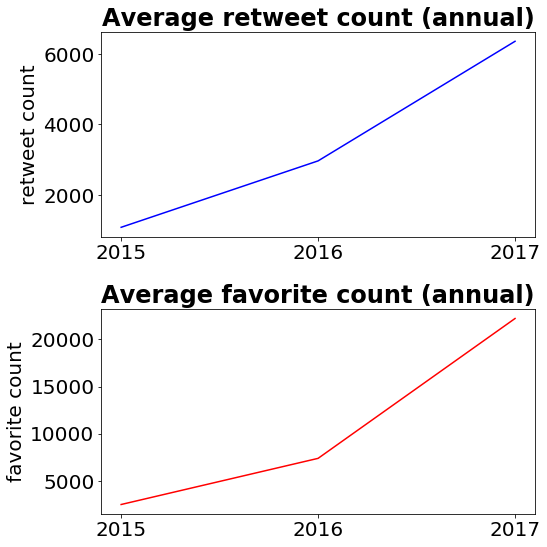

In [161]:
font = {'size': 24,
        'weight': 'heavy'} 

# first subplot 
plt.subplot(2,1,1)
average_retweet_count = archive_master['retweet_count'].\
resample(rule='A').mean()
plt.plot(['2015','2016','2017'], average_retweet_count, color='blue')
plt.ylabel('retweet count', fontsize='medium')
plt.title('Average retweet count (annual)', fontdict=font)

# Second subplot 
plt.subplot(2,1,2)
average_favorite_annual = archive_master['favorite_count'].\
resample(rule='A').mean()
plt.plot(['2015','2016','2017'], average_favorite_annual, color='red')
#average_favorite_annual.plot(kind='line')
plt.ylabel('favorite count', fontsize='medium')
plt.title('Average favorite count (annual)', fontdict=font)

plt.tight_layout()
plt.show();

In [162]:
average_retweet_count, average_favorite_annual

(timestamp
 2015-12-31    1079.586466
 2016-12-31    2964.176357
 2017-12-31    6357.323907
 Freq: A-DEC, Name: retweet_count, dtype: float64, timestamp
 2015-12-31     2491.741353
 2016-12-31     7383.212209
 2017-12-31    22209.267352
 Freq: A-DEC, Name: favorite_count, dtype: float64)

During the period specified, **both** retweet and favorites count for the WeRateDogs twitter page increased on ***average*** per year
* favorite count - increased from around 1080 (2015) to 6357 (2017)
* retweet count - increased from around 2492 (2015) to 22209 (2017)

Given how both of these variables increase at a similar pace, this calls for seeing if there is a correlation between favorites and retweet counts for this twitter page...<br><br>

In [163]:
archive_master.head(1)

,tweet_id,retweet_count,favorite_count,source,text,rating_numerator,rating_denominator,name,dog_stage
timestamp,,,,,,,,,
2017-08-01 16:23:56,892420643555336193,8853,39467,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,10,10,Phineas,None


> Correlation between retweet and favorite count - scatter plot and correlation heatmap

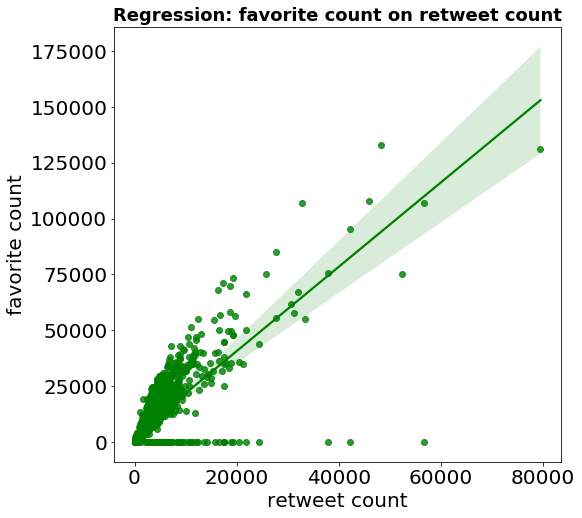

In [166]:
font = {'size': 18,
        'weight': 'heavy'} 

data= archive_master 
sns.regplot(x='retweet_count', y='favorite_count'
            , data=data, truncate=True, color='g')
plt.ylabel('favorite count', fontsize='medium')
plt.xlabel('retweet count', fontsize='medium')
plt.title('Regression: favorite count on retweet count', fontdict=font);

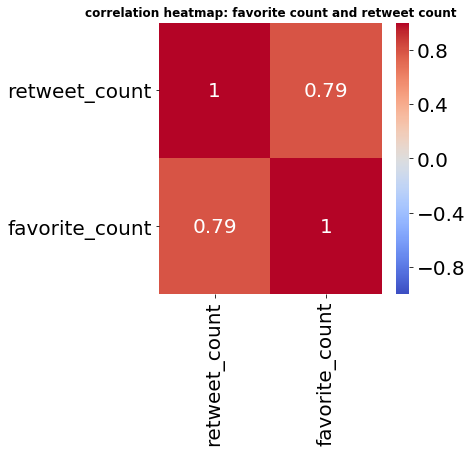

In [167]:
font = {'size': 12,
        'weight': 'heavy'} 

plt.figure(figsize=(5,5))
sns.heatmap(archive_master[['retweet_count', 
                            'favorite_count']].corr(),
           vmin=-1,
           cmap='coolwarm',
           annot=True)

plt.title('correlation heatmap: favorite count and retweet count',
          fontdict=font);

Looking at the graphic that illustrates a fitted linear regression (Scatter plot) model that estimates the relationship of favorite count on retweet count, we see many of the data points close to the estimated regression line, which illustrates a reasonably ***strong*** **positive correlation**.
<br><br>
This is reinforced by visualising the correlation heatmap, where the correlation coefficient between the above variables is **0.79** that supports this interpretation. Hence, it is reasonable to suggest that as the favorite count increases, the retweet count also increases.